In [31]:
%pip install tensorflow

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 25.2 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


In [32]:
!gdown 1xGkTT3uwYt4myj6eJJeYtdEFgTi2Sj8C
!unzip cat-dog-images.zip

Downloading...
From: https://drive.google.com/uc?id=1xGkTT3uwYt4myj6eJJeYtdEFgTi2Sj8C
To: c:\Users\sally\SKNPYWORKSPACE\deep-learning\cat-dog-images.zip

  0%|          | 0.00/182k [00:00<?, ?B/s]
100%|██████████| 182k/182k [00:00<00:00, 2.30MB/s]
'unzip'��(��) ���� �Ǵ� �ܺ� ����, ������ �� �ִ� ���α׷�, �Ǵ�
��ġ ������ �ƴմϴ�.


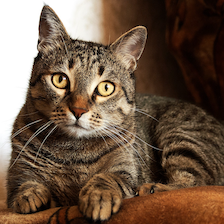

(1, 224, 224, 3)

In [33]:
# VGGNet
from tensorflow import keras
import numpy as np
import tensorflow as tf
from PIL import Image
from tensorflow.keras.applications import vgg16
cat_img = Image.open("C:\\Users\\sally\\SKNPYWORKSPACE\\deep-learning\\images\\cat.png")
display(cat_img)
cat_array = np.array(cat_img)

vggnet = keras.applications.VGG16()
vgg_prep_cat = vgg16.preprocess_input(cat_array)

cat_array[np.newaxis, :].shape  #tensor unsqueeze()와 동일

In [34]:
# 이미지 파일을 넘파이 배열로 변환
from PIL import Image
import numpy as np
cat_png = Image.open("C:\\Users\\sally\\SKNPYWORKSPACE\\deep-learning\\images\\cat.png")
cat_array = np.array(cat_png)

In [35]:
vgg_prep_cat = tf.keras.applications.vgg16.preprocess_input(cat_array)
vgg_prep_cat.shape

(224, 224, 3)

In [36]:
# 분류
prediction = vggnet.predict(vgg_prep_cat[np.newaxis,:])    #배치차원 추가

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 535ms/step


In [37]:
np.argmax(prediction[0]), prediction[0][208]

(np.int64(281), np.float32(3.6522176e-06))

In [38]:
from tensorflow.keras.applications.vgg16 import decode_predictions
decode_predictions(prediction)

[[('n02123045', 'tabby', np.float32(0.43275332)),
  ('n02124075', 'Egyptian_cat', np.float32(0.3112805)),
  ('n02123159', 'tiger_cat', np.float32(0.21606436)),
  ('n02971356', 'carton', np.float32(0.0035795628)),
  ('n03223299', 'doormat', np.float32(0.0031308224))]]

In [ ]:
# ResNet
# 층을 깊게 쌒으면 -> 더 복잡한 패턴을 학습
# 네트웍이 깊어지면
    # 기울기 소실(소실/폭발)
# Residual Learning 잔차 연결
# x -> H(x)
# F(x) = H(x)-x Residual 잔차를 학습
# 스킵커넥션 = 최종 출력 H(x) = f(x) + x  

In [41]:
# ResNet 모델
import keras
from keras import layers
inputs = layers.Input(shape=(224,224,3))
x = layers.ZeroPadding2D(padding=3)(inputs)
x = layers.Conv2D(64,  kernel_size = 7, strides= 2)(x)
x = layers.BatchNormalization()(x)
x = layers.Activation('relu')(x)
x = layers.ZeroPadding2D(padding=1)(x)
x = layers.MaxPool2D(pool_size=3, strides=2)(x)

In [49]:
def residual_block(x, filters, first_stride=1, conv_skip=False):
    skip_conn = x
    x = layers.Conv2D(filters=filters, kernel_size=1,
                      strides=first_stride)(x)
    x = layers.BatchNormalization(epsilon=1e-5)(x)
    x = layers.Activation('relu')(x)
    x = layers.Conv2D(filters=filters, kernel_size=3,
                      padding='same')(x)
    x = layers.BatchNormalization(epsilon=1e-5)(x)
    x = layers.Activation('relu')(x)
    x = layers.Conv2D(filters=filters*4, kernel_size=1)(x)
    x = layers.BatchNormalization(epsilon=1e-5)(x)
    # conv_skip이 True 이면 1x1 합성곱ㅇ르 사용해 채널 크기를 fillers*4로 늘려준다
    if conv_skip == True:
        skip_conn = layers.Conv2D(filters=filters*4, kernel_size=1,
                                  strides=first_stride)(skip_conn)
        skip_conn = layers.BatchNormalization(epsilon=1e-5)(skip_conn)
    x = layers.Add()([skip_conn, x])
    x = layers.Activation('relu')(x)
    return x
     

In [50]:

# 잔차 스택
def build_stack(x):
  #  첫번째 잔차스택의 첫번째 잔차 블럭만 스트라이드 1
  x = residual_stack(x, 3, 64, first_stride=1)
  for blocks, filters in [(4, 128), (6, 256), (3, 512)]:
      x = residual_stack(x, blocks, filters, first_stride=2)
  return x

def residual_stack(x, blocks, filters, first_stride=2):
  # 합성곱 스킵커넥션
  x = residual_block(x, filters, first_stride=first_stride, conv_skip=True)
  for _ in range(1, blocks):
      x = residual_block(x, filters, first_stride=1, conv_skip=False)
  return x
     

In [ ]:
# ResNet 모델
x = build_stack(x)
x = layers.GlobalAveragePooling2D()(x)
output = layers.Dense(1000, activation='softmax')(x)
model = keras.Model(inputs=inputs, outputs=output)
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

ValueError: Input 0 of layer "conv2d_56" is incompatible with the layer: expected min_ndim=4, found ndim=2. Full shape received: (None, 2048)

In [52]:
model.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_5       │ (None, 224, 224,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ zero_padding2d_2    │ (None, 230, 230,  │          0 │ input_layer_5[0]… │
│ (ZeroPadding2D)     │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d (Conv2D)     │ (None, 112, 112,  │      9,472 │ zero_padding2d_2… │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalization │ (None, 112, 112,  │        256 │ conv2d[0][0]      │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation          │ (None, 112, 112,  │          0 │ batch_normalizat… │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ zero_padding2d_3    │ (None, 114, 114,  │          0 │ activation[0][0]  │
│ (ZeroPadding2D)     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling2d       │ (None, 56, 56,    │          0 │ zero_padding2d_3… │
│ (MaxPooling2D)      │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_1 (Conv2D)   │ (None, 56, 56,    │      4,160 │ max_pooling2d[0]… │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 56, 56,    │        256 │ conv2d_1[0][0]    │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation_1        │ (None, 56, 56,    │          0 │ batch_normalizat… │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_2 (Conv2D)   │ (None, 56, 56,    │     36,928 │ activation_1[0][… │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 56, 56,    │        256 │ conv2d_2[0][0]    │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation_2        │ (None, 56, 56,    │          0 │ batch_normalizat… │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_4 (Conv2D)   │ (None, 56, 56,    │     16,640 │ max_pooling2d[0]… │
│                     │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_3 (Conv2D)   │ (None, 56, 56,    │     16,640 │ activation_2[0][… │
│                     │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 56, 56,    │      1,024 │ conv2d_4[0][0]    │
│ (BatchNormalizatio… │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 56, 56,    │      1,024 │ conv2d_3[0][0]  

 Total params: 23,587,712 (89.98 MB)

 Trainable params: 23,534,592 (89.78 MB)

 Non-trainable params: 53,120 (207.50 KB)

In [55]:
# 이미지를 넘파이 배열로 모델에 넣으면 된다.
from keras.preprocessing.image import load_img, img_to_array
img = load_img('C:\\Users\\sally\\SKNPYWORKSPACE\\deep-learning\\images\\cat.png', target_size=(224,224))
X = img_to_array(img)
X = np.expand_dims(X, axis=0)
np.argmax(model.predict(X))

1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step


np.int64(1045)

In [56]:
X[np.newaxis, :].shape, np.expand_dims(X,axis=0).shape

((1, 1, 224, 224, 3), (1, 1, 224, 224, 3))